# Data Preparation and Processing with Numpy
Here we'll generate a random medical dataset where-


*   age 13-100
*   2100 participents, 50% less than 65 years old, rest of em are older
*   95% older experienced side effects
*   5% youngers experienced side effects






import the needed libraries for generating datasets


In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Describe log directory

In [2]:
logdir='log'

creat empty list

In [3]:
train_labels=[]
train_samples=[]

Generate the datas and append them to the datasets

In [4]:
for i in range(50):
  #1 means side effect
  random_younger = randint(13,65)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,65)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)


Now, we'll convert these lists into NumPy array

In [5]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)

Now we'll **NORMALIZE** the data using MinMaxScaler

In [6]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


Here we'll input all of the Deeplearning moduls we need for our model.

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

# **BUILDING** the actual model


*   Sequential  is a linear model with 1 input and 1 output
*   ReLU  is the most commonly used activation function in deep learning. The function returns 0 if the input is negative, but for any positive input, it returns that value back.
*   The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability 
*italicised text*







In [8]:
model = Sequential([
    Dense(16, input_shape=(1,),activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
]
)

we'll print out the architecture of the model now

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Compliling the data
Compiliong the model prepares it for the training. Here we need to configure the following things:

*   **Optimizer**: An optimizer is a function or an algorithm that modifies the weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

*   **Loss**: loss is a number indicating how bad the model's prediction was on a single example.

*   **Learning Rate:** hwo much to change each time to get minimum loss
*   **ADAM:** Adam is an alternative optimization algorithm that provides more efficient neural network weights by running repeated cycles of “adaptive moment estimation.”


*   **Sparse_catagorigal_crossed_entrophy:** Save and categorize content based on your preferences. Computes the crossentropy loss between the labels and predictions.





In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

# Train the data by calling the fit function


*   **Batch size:**a number of samples processed before the model is updated. 

*  **Epochs:**the total number of iterations of all the training data in one cycle for training the machine learning model. 
*   **Verbose:**the choice that how you want to see the output of your Nural Network while it's training. If you set verbose = 0, It will show nothing.


*   We'll see that Accuracy increases and loss decreases with each epoch
*   **Validation split** helps to improve the model performance by fine-tuning the model after each epoch.









In [11]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2 )

Epoch 1/30
189/189 - 1s - loss: 0.6690 - Accuracy: 0.5529 - val_loss: 0.6593 - val_Accuracy: 0.6286 - 983ms/epoch - 5ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6469 - Accuracy: 0.6577 - val_loss: 0.6308 - val_Accuracy: 0.7095 - 245ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6199 - Accuracy: 0.7291 - val_loss: 0.6058 - val_Accuracy: 0.7333 - 244ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5954 - Accuracy: 0.7598 - val_loss: 0.5804 - val_Accuracy: 0.7810 - 243ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5696 - Accuracy: 0.7910 - val_loss: 0.5535 - val_Accuracy: 0.8143 - 247ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5425 - Accuracy: 0.8090 - val_loss: 0.5253 - val_Accuracy: 0.8238 - 274ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5146 - Accuracy: 0.8333 - val_loss: 0.4967 - val_Accuracy: 0.8476 - 240ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4867 - Accuracy: 0.8545 - val_loss: 0.4693 - val_Accuracy: 0.8571 - 232ms/epoch - 1ms/step


# Train, Test, & Validation Sets


*   **The training set:** It's the set of data used to train the model.

*   **The validation set:**  that is used to validate our model during training. validation set is to ensure that our model is not *overfitting* to the data in the training set. 
*   **The test set:** is a set of data that is used to test the model after the model has already been trained. The test set is separate from both the training set and validation set.






# Here we'll create a test dataset

In [12]:
test_labels=[]
test_samples=[]

for i in range(50):
  #1 means side effect
  random_younger = randint(13,65)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  random_younger = randint(13,65)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaler = MinMaxScaler(feature_range= (0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Making Predictions


*   For predicting, essentially what we're doing is passing our **unlabeled test data** to the model and having the model predict on what it thinks about each sample in our test data. 

*   



In [13]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions= np.argmax(predictions, axis=-1)

# Create a Confusion Matrix for Neural Network Predictions

In [14]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [15]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

called **plot_confusion_matrix()** that came directly from scikit-learn's website.

In [16]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 950  100]
 [  44 1006]]


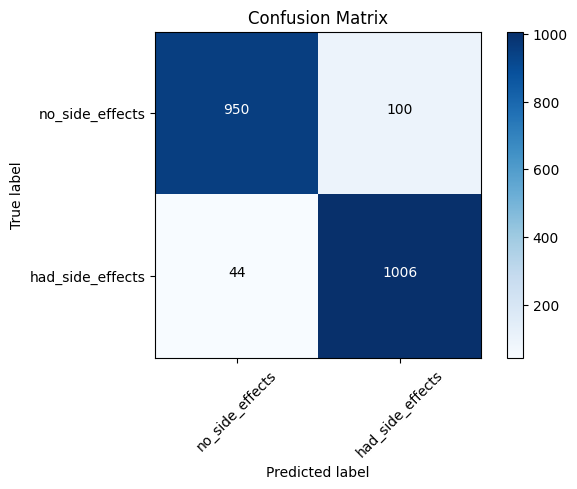

In [17]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Now we'll save the model on the disk for later use

In [18]:
import os.path
if os.path.isfile('models/medical.h5') is False:
  model.save('models/medical.h5')


# Load model





In [19]:
from tensorflow.keras.models import load_model
new_model=load_model('models/medical.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
